In [2]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [4]:
ipl_data = pd.read_csv("C:\data sets\IPL Ball-by-Ball 2008-2020.csv")
ipl_data.head()



,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [5]:
ipl_data.shape

(193468, 18)

In [6]:
ipl_data.describe()

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
count,1.934680e+05,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000
mean,7.567688e+05,1.482131,9.177027,3.615967,1.240231,0.066414,1.306645,0.000083,0.049078
std,3.060971e+05,0.499682,5.676848,1.807128,1.610867,0.339991,1.598802,0.009094,0.216031
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.012270e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.292970e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.082628e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.237181e+06,2.000000,19.000000,9.000000,6.000000,7.000000,7.000000,1.000000,1.000000


In [7]:
ipl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [8]:
#Null values in the data set
ipl_data.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [9]:
corelation = ipl_data.corr()

<Figure size 1296x1296 with 0 Axes>

<AxesSubplot:>

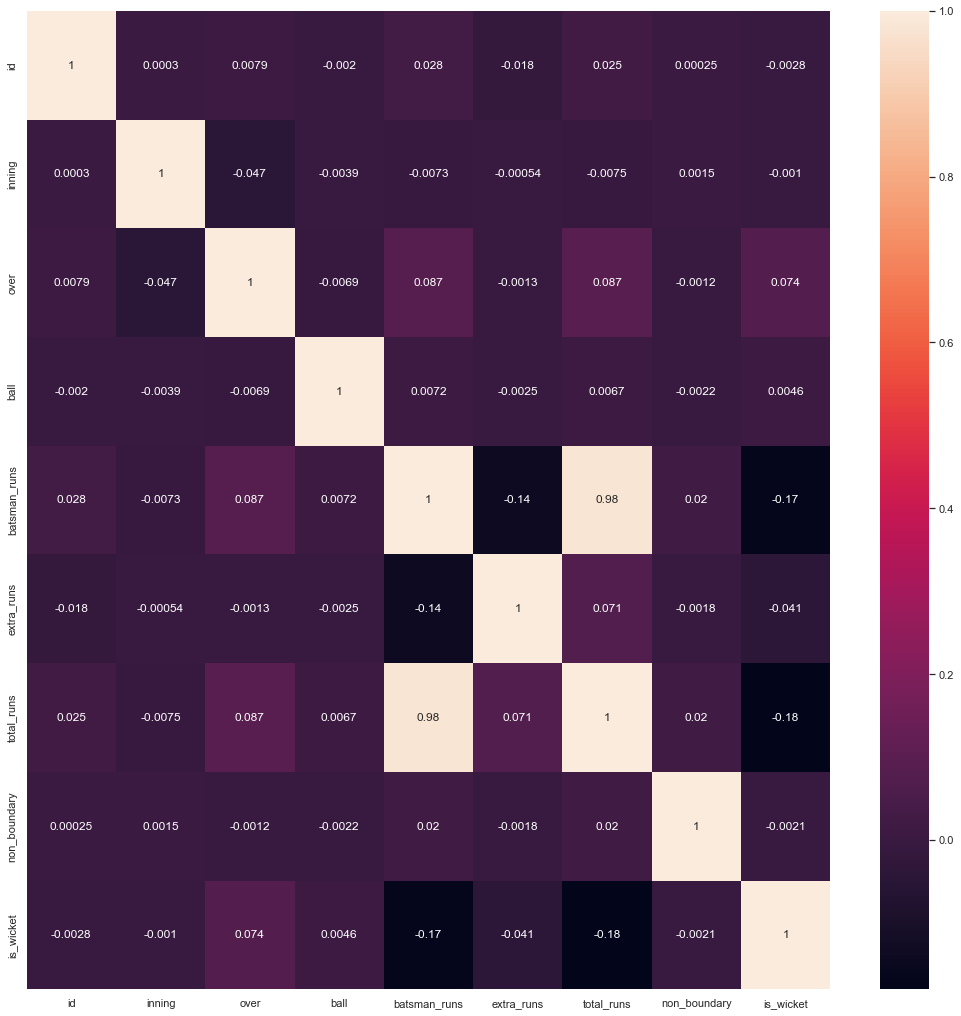

In [10]:
plt.figure(figsize=(18,18))
sns.heatmap(corelation, xticklabels = corelation.columns, yticklabels = corelation.columns, annot = True)

In [11]:
most_runs = ipl_data.groupby(['batsman'])['total_runs'].sum().reset_index()
most_runs.head()

,batsman,total_runs
0,A Ashish Reddy,288
1,A Chandila,4
2,A Chopra,58
3,A Choudhary,25
4,A Dananjaya,4


In [12]:
desc_most_runs = ipl_data.sort_values(by="total_runs", ascending=False)
desc_most_runs

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
185711,1216519,1,18,1,RR Pant,MP Stoinis,Mohammed Siraj,6,1,7,0,0,NaN,NaN,NaN,noballs,Delhi Capitals,Royal Challengers Bangalore
78918,598008,2,15,4,CH Gayle,AB de Villiers,JH Kallis,6,1,7,0,0,NaN,NaN,NaN,noballs,Royal Challengers Bangalore,Kolkata Knight Riders
98262,729309,2,4,2,M Vijay,Q de Kock,SL Malinga,0,7,7,0,0,NaN,NaN,NaN,penalty,Delhi Daredevils,Mumbai Indians
71259,548360,2,10,6,CH Gayle,V Kohli,PP Ojha,6,1,7,0,0,NaN,NaN,NaN,noballs,Royal Challengers Bangalore,Mumbai Indians
110587,829719,2,16,8,S Dhawan,KL Rahul,AN Ahmed,6,1,7,0,0,NaN,NaN,NaN,noballs,Sunrisers Hyderabad,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131099,980973,1,6,3,S Dhawan,DA Warner,HH Pandya,0,0,0,0,0,NaN,NaN,NaN,NaN,Sunrisers Hyderabad,Mumbai Indians
131097,980973,1,6,1,S Dhawan,DA Warner,HH Pandya,0,0,0,0,0,NaN,NaN,NaN,NaN,Sunrisers Hyderabad,Mumbai Indians
53675,501250,1,0,1,S Dhawan,DB Ravi Teja,B Kumar,0,0,0,0,0,NaN,NaN,NaN,NaN,Deccan Chargers,Pune Warriors
131092,980973,1,5,2,DA Warner,S Dhawan,MJ McClenaghan,0,0,0,0,0,NaN,NaN,NaN,NaN,Sunrisers Hyderabad,Mumbai Indians


In [13]:
max_runs = most_runs.max()
max_runs

batsman       Z Khan
total_runs      6081
dtype: object

In [14]:
min_runs = most_runs.min()
min_runs

batsman       A Ashish Reddy
total_runs                 0
dtype: object

In [15]:
matches = pd.read_csv("C:\data sets\IPL Matches 2008-2020 (1).csv")
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [16]:
matches.shape

(816, 17)

In [17]:
matches.describe()

,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


In [18]:
matches['season'] = pd.DatetimeIndex(matches['date']).year

In [19]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
 17  season          

In [20]:
matches.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
season               0
dtype: int64

In [21]:
total_null_values = matches.isnull().sum().sum()
total_null_values

843

In [22]:
#droping methods as it has highest null values
cd = matches.dropna(subset = ['method'])
cd.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
40,336022,Delhi,2008-05-17,DPMD Jayawardene,Feroz Shah Kotla,0,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,Kings XI Punjab,runs,6.0,N,D/L,AV Jayaprakash,RE Koertzen,2008
43,336025,Kolkata,2008-05-18,M Ntini,Eden Gardens,0,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,Chennai Super Kings,runs,3.0,N,D/L,Asad Rauf,K Hariharan,2008
60,392183,Cape Town,2009-04-19,DL Vettori,Newlands,1,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,field,Delhi Daredevils,wickets,10.0,N,D/L,MR Benson,SD Ranade,2009
63,392186,Durban,2009-04-21,CH Gayle,Kingsmead,1,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,runs,11.0,N,D/L,DJ Harper,SD Ranade,2009
89,392214,Centurion,2009-05-07,ML Hayden,SuperSport Park,1,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,Chennai Super Kings,runs,12.0,N,D/L,DJ Harper,TH Wijewardene,2009


In [23]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 40 to 667
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               19 non-null     int64  
 1   city             19 non-null     object 
 2   date             19 non-null     object 
 3   player_of_match  19 non-null     object 
 4   venue            19 non-null     object 
 5   neutral_venue    19 non-null     int64  
 6   team1            19 non-null     object 
 7   team2            19 non-null     object 
 8   toss_winner      19 non-null     object 
 9   toss_decision    19 non-null     object 
 10  winner           19 non-null     object 
 11  result           19 non-null     object 
 12  result_margin    19 non-null     float64
 13  eliminator       19 non-null     object 
 14  method           19 non-null     object 
 15  umpire1          19 non-null     object 
 16  umpire2          19 non-null     object 
 17  season          

In [24]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
 17  season          

<Figure size 1296x1296 with 0 Axes>

<AxesSubplot:>

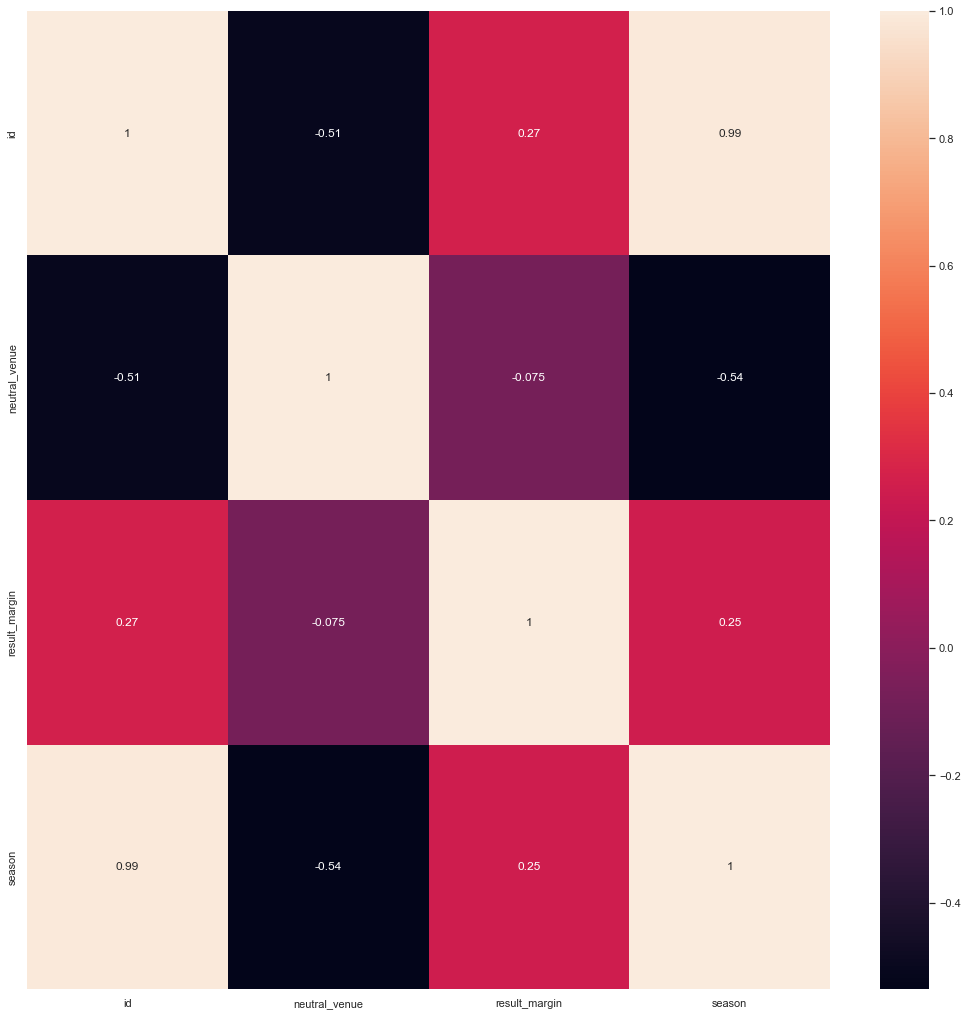

In [25]:
matches_corr = cd.corr()
plt.figure(figsize = (18,18))
sns.heatmap(matches_corr, xticklabels=matches_corr.columns, yticklabels = matches_corr.columns, annot = True)

In [26]:
merged = desc_most_runs[['id', 'total_runs']].merge(matches, left_on='id', right_on='id', how='left')
merged.head()

,id,total_runs,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,1216519,7,Dubai,2020-10-05,AR Patel,Dubai International Cricket Stadium,0,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Delhi Capitals,runs,59.0,N,NaN,Nitin Menon,YC Barde,2020
1,598008,7,Bangalore,2013-04-11,CH Gayle,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.0,N,NaN,Asad Rauf,AK Chaudhary,2013
2,729309,7,NaN,2014-04-27,M Vijay,Sharjah Cricket Stadium,1,Delhi Daredevils,Mumbai Indians,Mumbai Indians,bat,Delhi Daredevils,wickets,6.0,N,NaN,Aleem Dar,VA Kulkarni,2014
3,548360,7,Mumbai,2012-05-09,CH Gayle,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,9.0,N,NaN,BF Bowden,VA Kulkarni,2012
4,829719,7,Bangalore,2015-04-13,DA Warner,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,8.0,N,NaN,RM Deshpande,RK Illingworth,2015


In [27]:
season_most_runs = merged.groupby(['season'])['total_runs'].sum().reset_index()
season_most_runs.head()

,season,total_runs
0,2008,17937
1,2009,16320
2,2010,18864
3,2011,21154
4,2012,22453


In [28]:
season_most_runs.head().max()

season         2012
total_runs    22453
dtype: int64

In [29]:
season_most_runs.head().min()

season         2008
total_runs    16320
dtype: int64

In [30]:
most_run_batsman = ipl_data.groupby(['batsman'])['total_runs'].sum().reset_index()
most_run_batsman

,batsman,total_runs
0,A Ashish Reddy,288
1,A Chandila,4
2,A Chopra,58
3,A Choudhary,25
4,A Dananjaya,4
...,...,...
532,YV Takawale,207
533,Yashpal Singh,49
534,Younis Khan,3
535,Yuvraj Singh,2880


In [31]:
sort_batsman = most_run_batsman.sort_values(by = 'total_runs', ascending = False)
sort_batsman.head()

,batsman,total_runs
505,V Kohli,6081
438,SK Raina,5604
116,DA Warner,5522
407,S Dhawan,5452
379,RG Sharma,5394


In [32]:
sort_batsman.max()

batsman       Z Khan
total_runs      6081
dtype: object

In [33]:
sort_batsman[:20]

,batsman,total_runs
505,V Kohli,6081
438,SK Raina,5604
116,DA Warner,5522
407,S Dhawan,5452
379,RG Sharma,5394
96,CH Gayle,5103
24,AB de Villiers,5016
398,RV Uthappa,4878
301,MS Dhoni,4855
154,G Gambhir,4479


<AxesSubplot:>

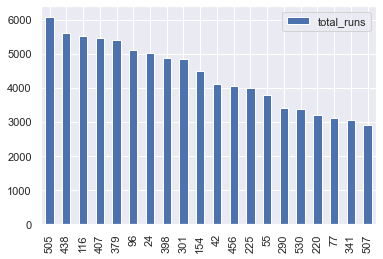

In [34]:
sort_batsman[:20].plot(kind = 'bar')

In [35]:
matches.toss_winner

0      Royal Challengers Bangalore
1              Chennai Super Kings
2                 Rajasthan Royals
3                   Mumbai Indians
4                  Deccan Chargers
                  ...             
811                 Mumbai Indians
812                 Delhi Capitals
813            Sunrisers Hyderabad
814                 Delhi Capitals
815                 Delhi Capitals
Name: toss_winner, Length: 816, dtype: object

In [36]:
matches.winner

0            Kolkata Knight Riders
1              Chennai Super Kings
2                 Delhi Daredevils
3      Royal Challengers Bangalore
4            Kolkata Knight Riders
                  ...             
811    Royal Challengers Bangalore
812                 Mumbai Indians
813            Sunrisers Hyderabad
814                 Delhi Capitals
815                 Mumbai Indians
Name: winner, Length: 816, dtype: object

In [53]:
man_match_toss= matches['toss_winner'].value_counts()
man_match_toss

Mumbai Indians                 106
Kolkata Knight Riders           98
Chennai Super Kings             97
Royal Challengers Bangalore     87
Rajasthan Royals                87
Kings XI Punjab                 85
Delhi Daredevils                80
Sunrisers Hyderabad             57
Deccan Chargers                 43
Pune Warriors                   20
Delhi Capitals                  20
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: toss_winner, dtype: int64

In [37]:
both_win = matches.toss_winner == matches.winner
both_win.value_counts()

True     418
False    398
dtype: int64

<AxesSubplot:ylabel='None'>

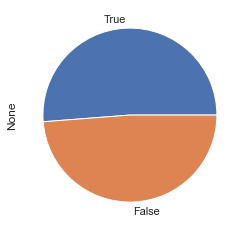

In [38]:

both_win.value_counts().plot(kind = 'pie')

<Figure size 1224x1224 with 0 Axes>

<AxesSubplot:xlabel='count', ylabel='winner'>

Text(0.5, 1.0, 'most matches won')

Text(0, 0.5, 'ipl teams')

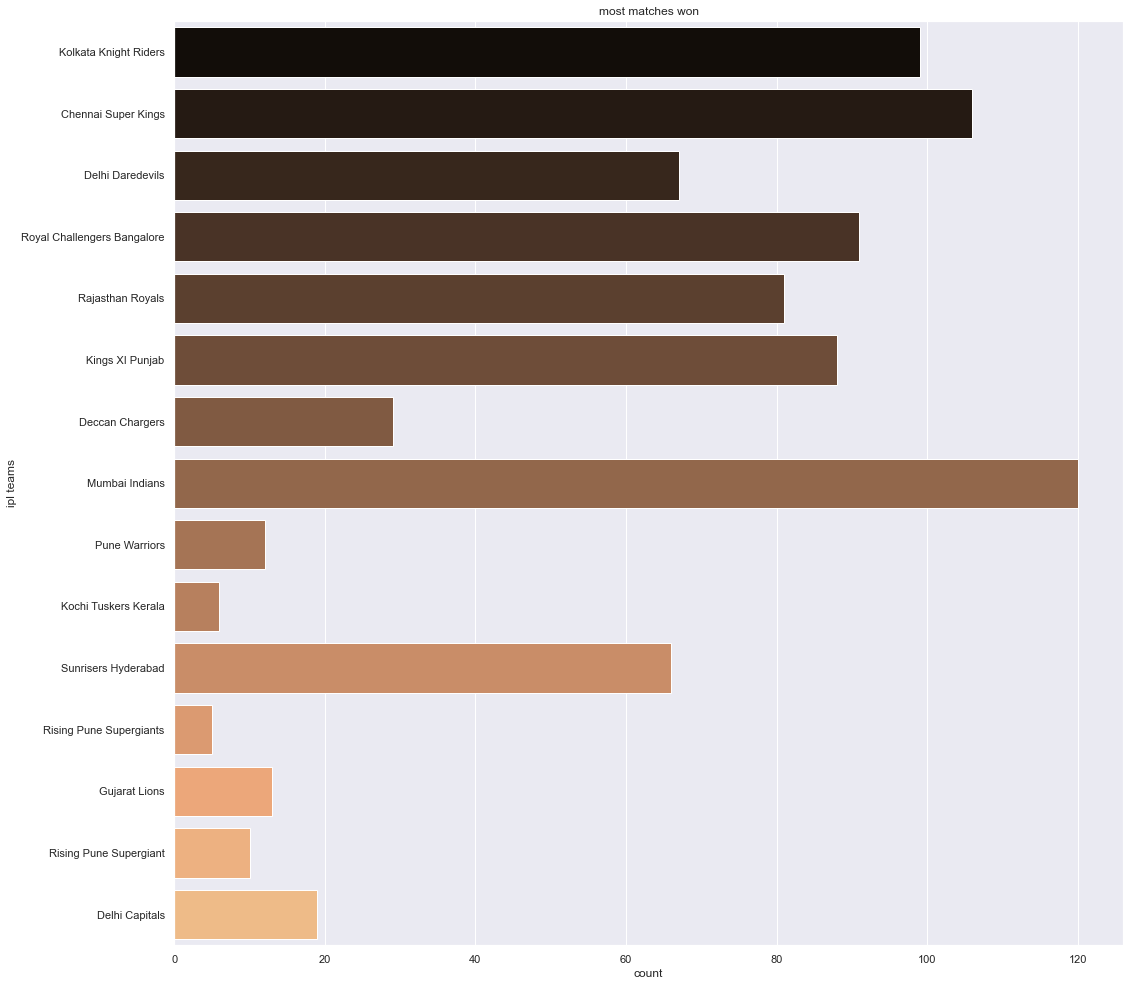

In [39]:
plt.figure(figsize = (17,17))
sns.countplot(y="winner", data=matches, palette="copper")
plt.title("most matches won")
plt.ylabel("ipl teams")

<Figure size 1224x1224 with 0 Axes>

<AxesSubplot:xlabel='count', ylabel='season'>

Text(0.5, 1.0, 'most playes in one season')

Text(0, 0.5, 'ipl teams')

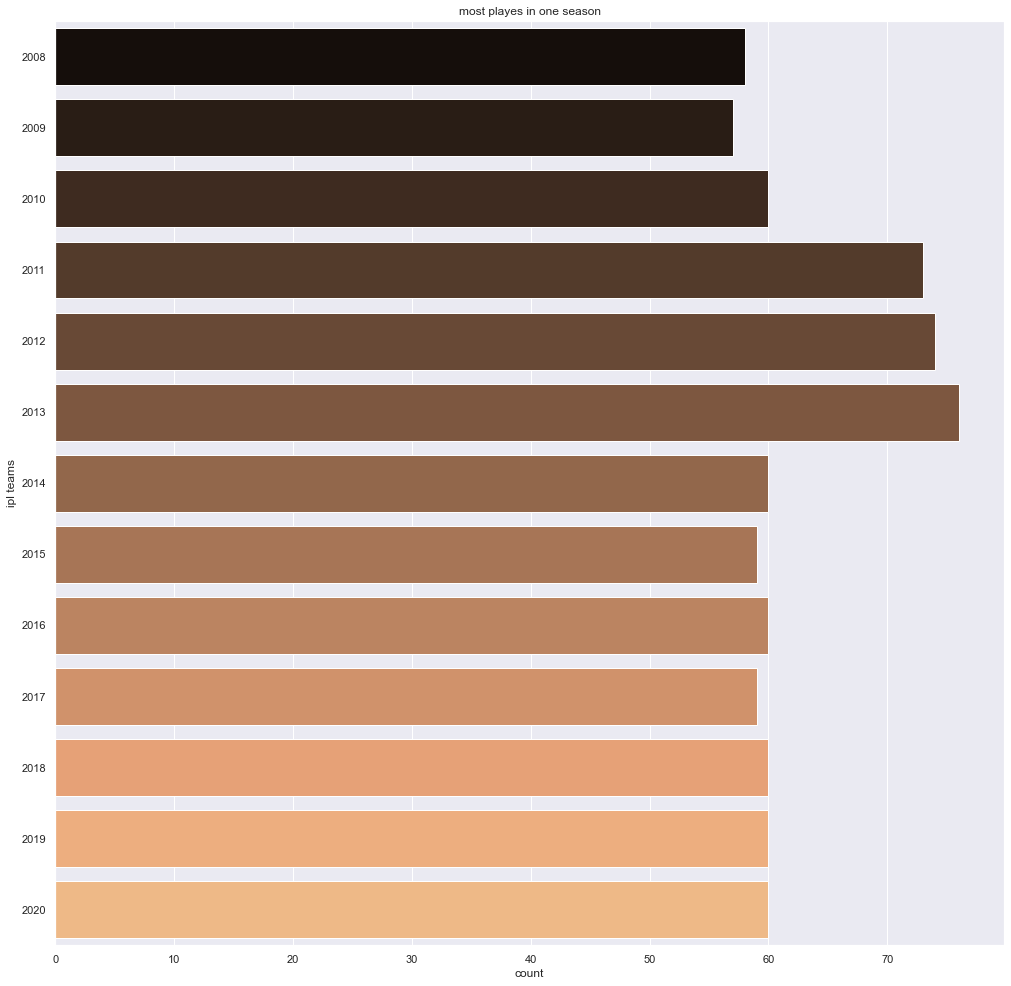

In [40]:
plt.figure(figsize = (17,17))
sns.countplot(y="season", data=matches, palette="copper")
plt.title("most playes in one season")
plt.ylabel("ipl teams")

<Figure size 1224x1224 with 0 Axes>

<AxesSubplot:xlabel='count', ylabel='city'>

Text(0.5, 1.0, 'most matches played in city')

Text(0, 0.5, 'ipl teams')

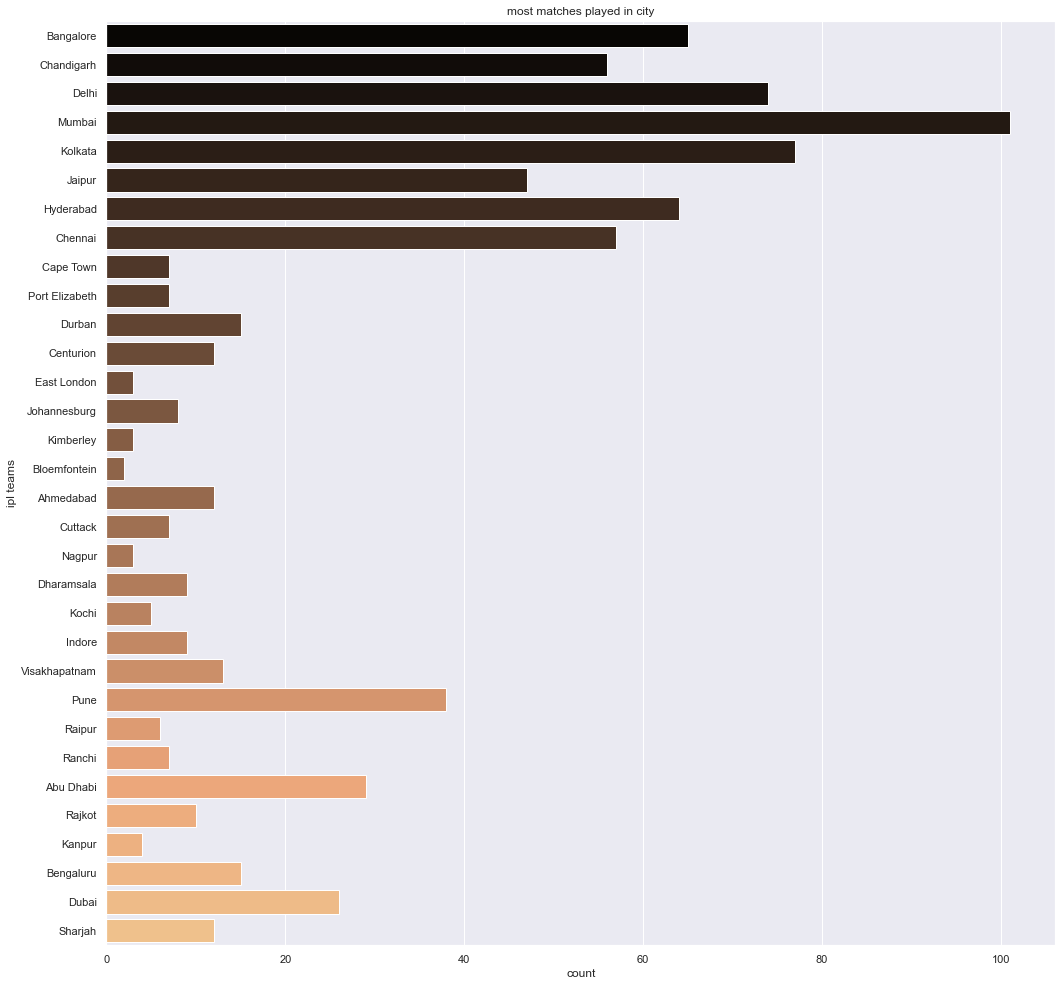

In [41]:
plt.figure(figsize = (17,17))
sns.countplot(y="city", data=matches, palette="copper")
plt.title("most matches played in city")
plt.ylabel("ipl teams")

In [42]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


<AxesSubplot:>

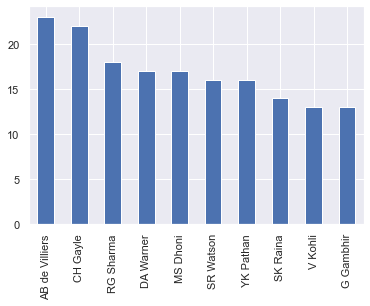

In [43]:
man_match = matches['player_of_match'].value_counts()
man_match[:10].plot(kind = 'bar')

In [44]:
man_match = matches['player_of_match'].value_counts()
man_match[:20]

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
SR Watson         16
YK Pathan         16
SK Raina          14
V Kohli           13
G Gambhir         13
AM Rahane         12
MEK Hussey        12
AD Russell        11
A Mishra          11
KA Pollard        11
DR Smith          11
V Sehwag          11
AT Rayudu         10
JH Kallis         10
SE Marsh           9
Name: player_of_match, dtype: int64

In [45]:
wins = matches['winner'].value_counts()
wins

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

eliminator  city      
N           Mumbai        100
            Kolkata        77
            Delhi          72
            Hyderabad      63
            Bangalore      62
            Chandigarh     56
            Chennai        56
            Jaipur         47
            Pune           38
            Abu Dhabi      27
Name: city, dtype: int64

<AxesSubplot:xlabel='eliminator,city'>

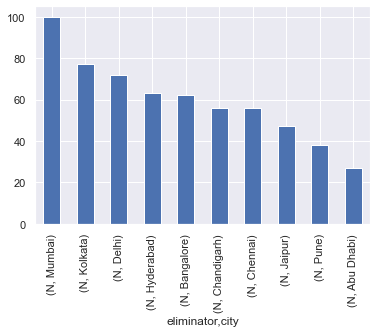

In [51]:
eliminator = matches.groupby(['eliminator'])['city'].value_counts()
eliminator[:10]
eliminator[:10].plot(kind='bar')

is_wicket  bowler         
0          Harbhajan Singh    3290
           R Ashwin           3174
           PP Chawla          3121
           A Mishra           3064
           SL Malinga         2786
           SP Narine          2681
           DJ Bravo           2671
           B Kumar            2649
           RA Jadeja          2637
           P Kumar            2535
           UT Yadav           2505
           DW Steyn           2171
           Z Khan             2157
           YS Chahal          2064
           R Vinay Kumar      2052
           JJ Bumrah          2040
           SR Watson          2030
           IK Pathan          2014
           Sandeep Sharma     2011
           AR Patel           1966
Name: bowler, dtype: int64

<AxesSubplot:xlabel='is_wicket,bowler'>

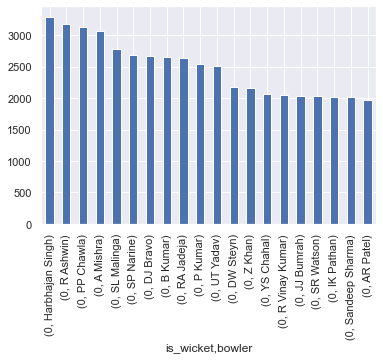

In [49]:
most_wicket = ipl_data.groupby(['is_wicket'])['bowler'].value_counts()
most_wicket[:20]
most_wicket[:20].plot(kind='bar')

In [48]:
ipl_data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
